In [9]:
get_ipython().run_line_magic('matplotlib', 'inline')
import xml.etree.ElementTree
import matplotlib.pyplot as plt
from collections import OrderedDict

In [57]:
# Parse clz backup

e = xml.etree.ElementTree.parse('backup.xml').getroot()
data = list(e)[2]

comics = []
for comic in list(data):
    main = comic.find('mainsection')
    t = main.find('title')
    comics.append({'title': t.text if t is not None else None, 
                   'series': {'data': main.find('series'), 'title': main.find('series').find('displayname').text if main.find('series').find('displayname') is not None else None},
        'data': main, 'issue': {'title': comic.find('issue'),'num': comic.find('issuenr')}, 'lang': comic.find('language').find('displayname').text if comic.find('language') is not None else '',
                  'publisher': comic.find('publisher').find('displayname').text})
comics = sorted(comics, key=lambda x: int(x['issue']['num'].text) if x['issue']['num'] is not None else 0)
comics = sorted(comics, key=lambda x: x['series']['title'] if x['series']['title'] is not None else x['title'])

print()
print("Books total: {}".format(len(comics)))


Books total: 162


In [58]:
# Dump all books

table = [["<b>Series</b>", "<b>Title</b>", "<b>Issue</b>", "<b>Language</b>", "<b>Publisher</b>"]]
for comic in comics:
    issue = ""
    if comic['issue']['title'] is not None:
        issue = comic['issue']['title'].text
    
    table.append([comic['series']['title'], comic['title'], issue, comic['lang'], comic['publisher']])

from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(table, tablefmt='html')))


Series,Title,Issue,Language,Publisher
Alias Omnibus,,1HC-B,English,Marvel Comics
American Vampire,,1HC,Russian,DC Comics
American Vampire,,2HC,Russian,DC Comics
American Vampire,,3HC,Russian,DC Comics
American Vampire,,4HC,Russian,DC Comics
"Archie, Vol. 2 HC / TP",,1TP,Russian,Archie Comic Publications
"Archie, Vol. 2 HC / TP",,2TP,Russian,Archie Comic Publications
"Archie, Vol. 2 HC / TP",,3TP,Russian,Archie Comic Publications
Batman,The Killing Joke,HC,English,DC Comics
Batman,Joker,HC,Russian,DC Comics


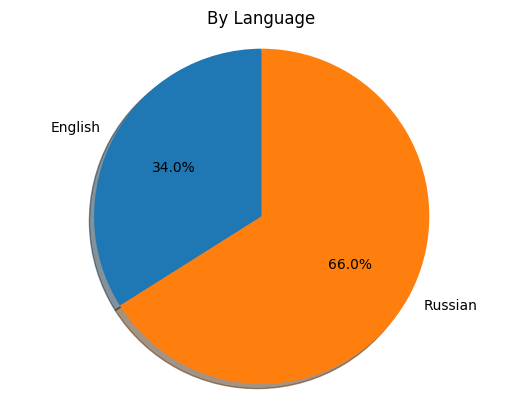

In [59]:
# Pie chart by language

langs = {}
for comic in comics:
    if comic['lang'] in langs:
        langs[comic['lang']] += 1
    else:
        langs[comic['lang']] = 1

labels = tuple(k for k in langs)
sizes = [langs[k]/len(comics)*100 for k in langs]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('By Language')

plt.show()

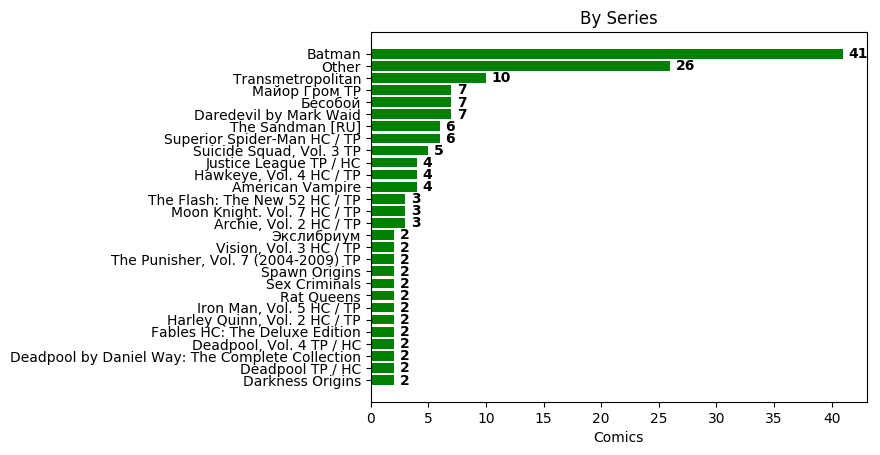

In [60]:
# Books by series

series = {}
for comic in comics:
    st = comic['series']['title']
    if st in series:
        series[st] += 1
    else:
        series[st] = 1

for k in series.copy():
    if ('Batman' in k or 'Dark ' in k) and 'Batman' != k:
        series['Batman'] += series[k]
        del series[k]

series = { k: series[k] for k in series if series[k] > 1 }
series['Other'] = len(comics) - sum(series.values())
series = OrderedDict(sorted(series.items(), key=lambda x: x[1]))

labels = tuple(k for k in series)
sizes = [series[k] for k in series]

import numpy as np
y_pos = np.arange(len(labels))

plt.rcdefaults()
fig, ax = plt.subplots()


ax.barh(y_pos, sizes, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel('Comics')
ax.set_title('By Series')
for i, v in enumerate(sizes):
    ax.text(v+.5, i -.35, str(v), color='black', fontweight='bold')

plt.show()

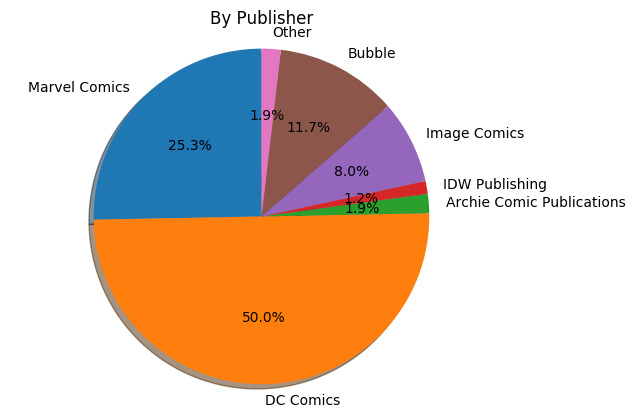

In [61]:
pubs = {}
for comic in comics:
    if comic['publisher'] in pubs:
        pubs[comic['publisher']] += 1
    else:
        pubs[comic['publisher']] = 1
        
pubs = { k: pubs[k] for k in pubs if pubs[k] > 1 }
pubs['Other'] = len(comics) - sum(pubs.values())
pubs['DC Comics'] += pubs['Азбука']
del pubs['Азбука']
labels = tuple(k for k in pubs)
sizes = [pubs[k]/len(comics)*100 for k in pubs]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('By Publisher')

plt.show()